# Jupyter notebook intro

Code cells starting with `%%` introduce special commands, lines starting with `!` are shell commands.

Otherwise they are Python (or other selected language).

In [1]:
message = 'Example of Python code'
message

'Example of Python code'

In [2]:
%%writefile hello.py
print('Hello, world!')

Overwriting hello.py


In [3]:
!python hello.py

Hello, world!


In [4]:
%%writefile add.py
"""Add one to command line input"""

import sys

def add_one(x):
    return x + 1

if __name__ == '__main__':
    number = int(sys.argv[1])
    result = add_one(number)
    print(result)

Overwriting add.py


In [5]:
!python add.py

Traceback (most recent call last):
  File "add.py", line 9, in <module>
    number = int(sys.argv[1])
IndexError: list index out of range


In [6]:
!python add.py 2

3


# Reading files in custom format

In [7]:
%%writefile custom.txt
123 = bread
134 = rolls
212 = milk
213 = butter

Overwriting custom.txt


In [8]:
%%writefile custom.py
"""Read from files that have custom format"""

# open a file for reading and iterate each line
with open('./custom.txt') as f:
    config = {}
    for line in f:
        # assign to multiple variables (tuple unpacking)
        id, name = line.strip().split(' = ')
        config[id] = name

for id in ["123", "213"]:
    print(config[id])

Overwriting custom.py


In [9]:
!python custom.py

bread
butter


## JSON files

In [10]:
%%writefile original.json
{
    "123": "bread",
    "134": "rolls",
    "212": "milk",
    "213": "butter"
}

Overwriting original.json


In [11]:
%%writefile json-files.py
"""Read and write JSON files"""

import json

with open('./original.json') as original, \
     open('./output.json', 'w') as output:
    config = json.load(original)
    config["133"] = config["134"]
    del config["134"]
    json.dump(config, output)

Overwriting json-files.py


In [12]:
!python json-files.py

In [13]:
!cat output.json

{"123": "bread", "212": "milk", "213": "butter", "133": "rolls"}


# CSV files

In [14]:
%%writefile original.csv
id,name
123,bread
134,rolls
212,milk
213,butter

Overwriting original.csv


In [15]:
import csv

with open('./original.csv') as f:
    reader = csv.reader(f)
    headers = next(reader)  # save the first line for later
    config = {}
    for id, name in reader:
        config[id] = name

config

{'123': 'bread', '134': 'rolls', '212': 'milk', '213': 'butter'}

In [16]:
with open('./output.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(headers)
    for id, name in config.items():
        writer.writerow([id, name])

In [17]:
!cat output.csv

id;name
123;bread
134;rolls
212;milk
213;butter


# Pandas

https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('./original.csv')

# Pandas' data frame
df

,id,name
0,123,bread
1,134,rolls
2,212,milk
3,213,butter


In [20]:
# data series (1 column of a data frame)
df.id

0    123
1    134
2    212
3    213
Name: id, dtype: int64

In [21]:
# filter data series based on other column(s)
df.name[df.id > 200]

2      milk
3    butter
Name: name, dtype: object

In [22]:
# convert to a numpy array
df.name[df.id > 200].values

array(['milk', 'butter'], dtype=object)

In [23]:
# vectorized operations
df.id * 2

0    246
1    268
2    424
3    426
Name: id, dtype: int64

In [24]:
df["tripple"] = df.id * 3
df

,id,name,tripple
0,123,bread,369
1,134,rolls,402
2,212,milk,636
3,213,butter,639


In [25]:
df[['tripple', 'name']].to_csv('./output-pandas.csv', index=False)

In [26]:
!cat output-pandas.csv

tripple,name
369,bread
402,rolls
636,milk
639,butter


# Pandas MultiIndex for higher dimensions
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [27]:
xs = np.arange(2)
ys = np.arange(2)
ts = np.arange(1000)

index = pd.MultiIndex.from_product([ts, xs, ys], names=['t', 'x', 'y'])
index

MultiIndex([(  0, 0, 0),
            (  0, 0, 1),
            (  0, 1, 0),
            (  0, 1, 1),
            (  1, 0, 0),
            (  1, 0, 1),
            (  1, 1, 0),
            (  1, 1, 1),
            (  2, 0, 0),
            (  2, 0, 1),
            ...
            (997, 1, 0),
            (997, 1, 1),
            (998, 0, 0),
            (998, 0, 1),
            (998, 1, 0),
            (998, 1, 1),
            (999, 0, 0),
            (999, 0, 1),
            (999, 1, 0),
            (999, 1, 1)],
           names=['t', 'x', 'y'], length=4000)

In [28]:
df = pd.DataFrame(np.random.randint(0, 256, (len(index), 3)), index=index, columns=['r', 'g', 'b'])
df

r    g    b
t   x y               
0   0 0  105  162   32
      1  118   49  118
    1 0    6  157  119
      1   23  186  104
1   0 0  103  190  156
...      ...  ...  ...
998 1 1   36  148    7
999 0 0  134  205  254
      1  153  142   74
    1 0  167   24   59
      1  174   51  122

[4000 rows x 3 columns]

In [29]:
# average for each (x, y) point across all values of t

df.mean(level=('x', 'y'))

r        g        b
x y                           
0 0  125.109  128.995  129.846
  1  126.155  124.547  131.644
1 0  127.868  127.465  124.716
  1  126.997  130.300  125.062

In [30]:
# vectorized formula, like in Excel

luminance = 0.2126*df.r + 0.7152*df.g + 0.0722*df.b
luminance

t    x  y
0    0  0    140.4958
        1     68.6512
     1  0    122.1538
        1    145.4258
1    0  0    169.0490
               ...   
998  1  1    114.0086
999  0  0    193.4432
        1    139.4290
     1  0     56.9288
        1     82.2760
Length: 4000, dtype: float64

In [31]:
totals = luminance.sum(level='t')
totals

t
0      476.7266
1      521.5392
2      545.2192
3      571.7114
4      514.1780
         ...   
995    430.2596
996    455.1778
997    514.2220
998    480.3604
999    472.0770
Length: 1000, dtype: float64

In [32]:
totals.head(100).sum()

51428.7782

In [33]:
big_picture = totals.groupby(totals.index // 100).sum()
big_picture

t
0    51428.7782
1    51742.0570
2    49006.0224
3    51693.6080
4    50619.5574
5    50238.4570
6    52074.6286
7    51760.2196
8    52324.7370
9    49315.2762
dtype: float64

In [34]:
big_picture.sort_values(ascending=False).head(3)

t
8    52324.7370
6    52074.6286
7    51760.2196
dtype: float64

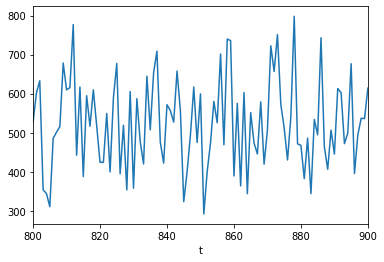

In [37]:
ax = totals[800:901].plot.line()